<a href="https://colab.research.google.com/github/TakuroTerui/PyOptBook/blob/main/%E6%95%B0%E7%90%86%E6%9C%80%E9%81%A9%E5%8C%96_ch7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/ohmsha/PyOptBook

Cloning into 'PyOptBook'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (84/84), done.
remote: Total 206 (delta 82), reused 71 (delta 46), pack-reused 76
Receiving objects: 100% (206/206), 2.31 MiB | 6.59 MiB/s, done.
Resolving deltas: 100% (99/99), done.


In [3]:
cd PyOptBook

/content/PyOptBook


In [4]:
import pandas as pd

log_df = pd.read_csv('7.recommendation/access_log.csv', parse_dates=['date'])
print(len(log_df))
log_df.head()

325908


,user_id,item_id,date
0,4,205587,2015-07-04
1,4,748683,2015-07-04
2,4,790055,2015-07-04
3,4,790055,2015-07-04
4,4,764638,2015-07-04


In [5]:
log_df['user_id'].value_counts().describe()

count    31443.000000
mean        10.365042
std         16.023399
min          2.000000
25%          3.000000
50%          5.000000
75%         11.000000
max        632.000000
Name: user_id, dtype: float64

In [6]:
log_df['item_id'].value_counts().describe()

count    87611.000000
mean         3.719944
std          8.802572
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        941.000000
Name: item_id, dtype: float64

In [7]:
log_df['date'].value_counts()

2015-07-03    45441
2015-07-02    45394
2015-07-01    44163
2015-07-04    43804
2015-07-08    39933
2015-07-05    39932
2015-07-07    33930
2015-07-06    33311
Name: date, dtype: int64

In [8]:
import datetime
start_date = datetime.datetime(2015,7,1)
end_date = datetime.datetime(2015,7,7)
target_date = datetime.datetime(2015,7,8)

In [9]:
x_df = log_df[(start_date <= log_df['date']) & (log_df['date'] <= end_date)]
print(len(x_df))
x_df.head(3)

285975


,user_id,item_id,date
0,4,205587,2015-07-04
1,4,748683,2015-07-04
2,4,790055,2015-07-04


In [10]:
y_df = log_df[log_df['date'] == target_date]
print(len(y_df))
y_df.head()

39933


,user_id,item_id,date
103,94,603852,2015-07-08
104,94,28600,2015-07-08
105,94,987320,2015-07-08
106,94,109924,2015-07-08
107,94,886214,2015-07-08


In [11]:
U2I2Rcens = {}
for row in x_df.itertuples():
    # 最新度（経過日数）の算出：基準日 - 最終閲覧日
    rcen = (target_date - row.date).days

    # 辞書に最新度を登録
    U2I2Rcens.setdefault(row.user_id, {})
    U2I2Rcens[row.user_id].setdefault(row.item_id, [])
    U2I2Rcens[row.user_id][row.item_id].append(rcen)

In [12]:
U2I2Rcens[2497]

{400521: [4, 2, 2, 2, 1], 678277: [4], 687963: [2], 178138: [1]}

In [13]:
Rows1 = []
for user_id, I2Rcens in U2I2Rcens.items():
    for item_id, Rcens in I2Rcens.items():
        freq = len(Rcens)
        rcen = min(Rcens)
        Rows1.append((user_id, item_id, rcen, freq))
UI2RF_df = pd.DataFrame(Rows1, columns=['user_id', 'item_id', 'rcen', 'freq'])
print(len(UI2RF_df))
UI2RF_df.head()

204661


,user_id,item_id,rcen,freq
0,4,205587,4,1
1,4,748683,4,1
2,4,790055,4,3
3,4,764638,4,2
4,4,492434,4,1


In [14]:
y_df = y_df.drop_duplicates()
print(len(y_df))
y_df['pv_flag'] = 1
y_df

29651


<ipython-input-14-6c1aa2c05efc>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_df['pv_flag'] = 1


,user_id,item_id,date,pv_flag
103,94,603852,2015-07-08,1
104,94,28600,2015-07-08,1
105,94,987320,2015-07-08,1
106,94,109924,2015-07-08,1
107,94,886214,2015-07-08,1
...,...,...,...,...
325676,423919,707537,2015-07-08,1
325679,423919,692138,2015-07-08,1
325682,423919,617597,2015-07-08,1
325715,423958,963019,2015-07-08,1


In [15]:
UI2RFP_df = pd.merge(UI2RF_df, y_df[['user_id', 'item_id', 'pv_flag']], how='left', on=['user_id', 'item_id'])
UI2RFP_df['pv_flag'].fillna(0, inplace=True)
print(len(UI2RFP_df))
UI2RFP_df.head()

204661


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


In [16]:
print(sorted(UI2RFP_df['rcen'].unique()))
print(sorted(UI2RFP_df['freq'].unique()))

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 32, 34, 35, 41, 43, 58, 63, 118]


In [17]:
tar_df = UI2RFP_df[UI2RFP_df['freq'] <= 7]
print(len(tar_df))
tar_df.head()

203456


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


In [18]:
print(tar_df['pv_flag'].sum())

2038.0


In [19]:
rcen_df = pd.crosstab(index=tar_df['rcen'], columns=tar_df['pv_flag'])
rcen_df = rcen_df.rename(columns={0:'neg', 1:'pos'})
rcen_df

pv_flag,neg,pos
rcen,,
1,24595,571
2,24032,274
3,28212,326
4,30641,275
5,31510,225
6,31721,199
7,30707,168


pv_flag,neg,pos,N,prob
rcen,,,,
1,24595,571,25166,0.022689
2,24032,274,24306,0.011273
3,28212,326,28538,0.011423
4,30641,275,30916,0.008895
5,31510,225,31735,0.007090
6,31721,199,31920,0.006234
7,30707,168,30875,0.005441


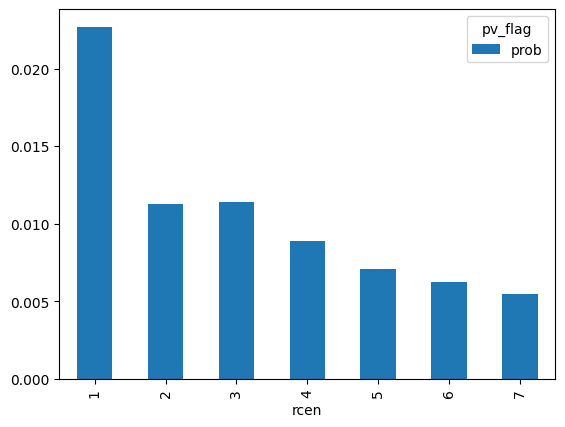

In [20]:
# 最新度(recency)に関する再閲覧確率の算出と確認
rcen_df['N'] = rcen_df['neg'] + rcen_df['pos']
rcen_df['prob'] = rcen_df['pos'] / rcen_df['N']
rcen_df[['prob']].plot.bar()
rcen_df

In [21]:
# 頻度(frequency)に関する閲覧数の集計
freq_df = pd.crosstab(index=tar_df['freq'], columns=tar_df['pv_flag'])
freq_df = freq_df.rename(columns = {0:'neg', 1:'pos'})
freq_df

pv_flag,neg,pos
freq,,
1,161753,964
2,24938,476
3,7733,258
4,3527,149
5,1807,88
6,1038,63
7,622,40


pv_flag,neg,pos,N,prob
freq,,,,
1,161753,964,162717,0.005924
2,24938,476,25414,0.018730
3,7733,258,7991,0.032286
4,3527,149,3676,0.040533
5,1807,88,1895,0.046438
6,1038,63,1101,0.057221
7,622,40,662,0.060423


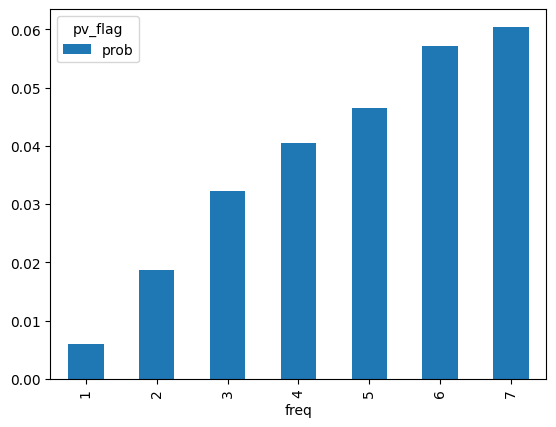

In [22]:
# 頻度(frequency)に関する再閲覧確率の算出と確認
freq_df['N'] = freq_df['neg'] + freq_df['pos']
freq_df['prob'] = freq_df['pos'] / freq_df['N']
freq_df[['prob']].plot.bar()
freq_df

### 数理モデル

In [23]:
# tar_dfの(再)確認
print(len(tar_df))
tar_df.head()

203456


,user_id,item_id,rcen,freq,pv_flag
0,4,205587,4,1,0.0
1,4,748683,4,1,0.0
2,4,790055,4,3,0.0
3,4,764638,4,2,0.0
4,4,492434,4,1,0.0


In [24]:
# 最新度(rcen)と頻度(freq)に対する総件数と再閲覧件数の算出
RF2N = {}
RF2PV = {}
for row in tar_df.itertuples():
    RF2N.setdefault((row.rcen, row.freq), 0)
    RF2PV.setdefault((row.rcen, row.freq), 0)
    RF2N[row.rcen, row.freq] += 1
    if row.pv_flag == 1:
        RF2PV[row.rcen, row.freq] += 1

In [25]:
# 最新度(rcen)と頻度(freq)に対する再閲覧確率の算出
RF2Prob = {}
for rf, N in RF2N.items():
    RF2Prob[rf] = RF2PV[rf] / N

In [26]:
# 最新度(rcen)と頻度(freq)に対して総件数、再閲覧件数、再閲覧確率を対応付けるデータの作成
Rows3 = []
for rf, N in sorted(RF2N.items()):
    pv = RF2PV[rf]
    prob = RF2Prob[rf]
    row = (rf[0], rf[1], N, pv, prob)
    Rows3.append(row)
rf_df = pd.DataFrame(Rows3, columns = ['rcen', 'freq', 'N', 'pv', 'prob'])
print(len(rf_df))
rf_df.head()

49


,rcen,freq,N,pv,prob
0,1,1,19602,245,0.012499
1,1,2,3323,132,0.039723
2,1,3,1120,81,0.072321
3,1,4,539,36,0.066790
4,1,5,285,36,0.126316


In [27]:
# 横持ち（テーブル形式）で確認
rf_df.pivot_table(index='rcen', columns='freq', values='prob')

freq,1,2,3,4,5,6,7
rcen,,,,,,,
1,0.012499,0.039723,0.072321,0.066790,0.126316,0.112994,0.175000
2,0.005856,0.021189,0.026973,0.056645,0.066225,0.098765,0.063830
3,0.006107,0.023230,0.039621,0.053265,0.039427,0.054054,0.050420
4,0.005454,0.015366,0.024521,0.046901,0.036667,0.037838,0.018349
5,0.004376,0.015504,0.023673,0.014925,0.021898,0.028902,0.030612
6,0.004456,0.009848,0.024514,0.019569,0.008511,0.024793,0.025316
7,0.004256,0.009086,0.014056,0.023377,0.009091,0.020408,0.000000


In [28]:
# データの可視化に必要なライブラリ群を取り込む
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

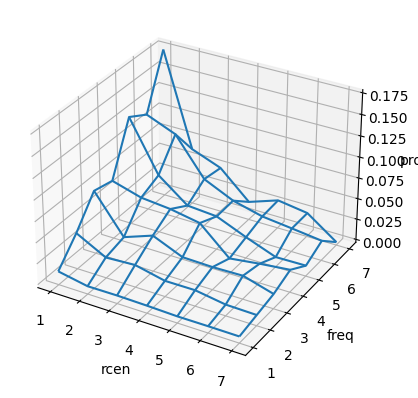

In [29]:
# 最新度(rcen)と頻度(freq)に対して再閲覧確率を対応付ける3Dグラフの作成
Freq = rf_df['freq'].unique().tolist()
Rcen = rf_df['rcen'].unique().tolist()
Z = [rf_df[(rf_df['freq']==freq) & (rf_df['rcen']==rcen)]['prob'].iloc[0] for freq in Freq for rcen in Rcen]
Z = np.array(Z).reshape((len(Freq), len(Rcen)))
X, Y = np.meshgrid(Rcen, Freq)  
fig = plt.figure()
ax = fig.add_subplot(111
                     , projection="3d"
                     , xlabel='rcen'
                     , ylabel='freq'
                     , zlabel='prob'
                    )
ax.plot_wireframe(X, Y, Z)

### 数理最適化モデル

In [30]:
import cvxopt

In [31]:
# 最新度(rcen)のリストと頻度(freq)のリストの作成
R = sorted(tar_df['rcen'].unique().tolist())
F = sorted(tar_df['freq'].unique().tolist())
print(R)
print(F)

[1, 2, 3, 4, 5, 6, 7]
[1, 2, 3, 4, 5, 6, 7]


In [32]:
# 最新度(rcen)と頻度(freq)のペアに対して変数の索引を作成する（何番目の変数かを決める）
Idx = []
RF2Idx = {}
idx = 0
for r in R:
    for f in F:
        Idx.append(idx)
        RF2Idx[r, f] = idx 
        idx += 1
print(Idx)
print(RF2Idx)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48]
{(1, 1): 0, (1, 2): 1, (1, 3): 2, (1, 4): 3, (1, 5): 4, (1, 6): 5, (1, 7): 6, (2, 1): 7, (2, 2): 8, (2, 3): 9, (2, 4): 10, (2, 5): 11, (2, 6): 12, (2, 7): 13, (3, 1): 14, (3, 2): 15, (3, 3): 16, (3, 4): 17, (3, 5): 18, (3, 6): 19, (3, 7): 20, (4, 1): 21, (4, 2): 22, (4, 3): 23, (4, 4): 24, (4, 5): 25, (4, 6): 26, (4, 7): 27, (5, 1): 28, (5, 2): 29, (5, 3): 30, (5, 4): 31, (5, 5): 32, (5, 6): 33, (5, 7): 34, (6, 1): 35, (6, 2): 36, (6, 3): 37, (6, 4): 38, (6, 5): 39, (6, 6): 40, (6, 7): 41, (7, 1): 42, (7, 2): 43, (7, 3): 44, (7, 4): 45, (7, 5): 46, (7, 6): 47, (7, 7): 48}


In [33]:
# 制約の定義に用いる行列Gとベクトルhを作成するための準備
G_list = []
h_list = []
var_vec = [0.0] * len(Idx)

In [34]:
# - pred_prob[r,f] <= 0 のモデリング
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        G_row = var_vec[:]
        G_row[idx] = -1 # pred_prob[r,f]の係数は-1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0
        
# pred_prob[r,f] <= 1 のモデリング
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        G_row = var_vec[:]
        G_row[idx] = 1 # pred_prob[r,f]の係数は1
        G_list.append(G_row)
        h_list.append(1) # 右辺は定数項1       

In [35]:
# - pred_prob[r,f] + pred_prob[r+1,f] <= 0 のモデリング
for r in R[:-1]:
    for f in F:
        idx1 = RF2Idx[r,f]
        idx2 = RF2Idx[r+1,f]
        G_row = var_vec[:]
        G_row[idx1] = -1 # pred_prob[r,f]の係数は-1
        G_row[idx2] = 1  # pred_prob[r+1,f]の係数は1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0

In [36]:
# pred_prob[r,f] - pred_prob[r,f+1] <= 0 のモデリング
for r in R:
    for f in F[:-1]:
        idx1 = RF2Idx[r,f]
        idx2 = RF2Idx[r,f+1]
        G_row = var_vec[:]
        G_row[idx1] = 1  # pred_prob[r,f]の係数は1
        G_row[idx2] = -1 # pred_prob[r,f+1]の係数は-1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0

In [37]:
# 目的関数の定義に用いる行列Pとベクトルqを作成するための準備
P_list = []
q_list = []

In [38]:
# N[r,f] * pred_prob[r,f]^2 - 2 * N[r,f] * pred_prob[r,f] のモデリング
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        N = RF2N[r,f]
        prob = RF2Prob[r,f]
        P_row = var_vec[:]
        P_row[idx] = 2 * N # (1/2)を打ち消すために2を掛ける
        P_list.append(P_row)
        ｑ_list.append( - 2 * N * prob)

In [39]:
# 行列の作成
G = cvxopt.matrix(np.array(G_list), tc='d')
h = cvxopt.matrix(np.array(h_list), tc='d')
P = cvxopt.matrix(np.array(P_list), tc='d')
q = cvxopt.matrix(np.array(q_list), tc='d')

In [40]:
# 求解
sol = cvxopt.solvers.qp(P, q, G, h)
status = sol['status']
status

     pcost       dcost       gap    pres   dres
 0: -5.2389e+01 -1.0625e+02  4e+02  2e+00  1e-02
 1: -5.2153e+01 -7.1273e+01  3e+01  5e-02  3e-04
 2: -5.2167e+01 -5.9818e+01  1e+01  2e-02  1e-04
 3: -5.1831e+01 -5.4852e+01  3e+00  2e-03  1e-05
 4: -5.1954e+01 -5.2335e+01  4e-01  2e-04  1e-06
 5: -5.1980e+01 -5.2002e+01  2e-02  4e-06  3e-08
 6: -5.1983e+01 -5.1983e+01  8e-04  1e-07  7e-10
 7: -5.1983e+01 -5.1983e+01  3e-05  2e-09  1e-11
Optimal solution found.


'optimal'

In [41]:
# 最新度(rcen)と頻度(freq)に対応する推定した再閲覧確率の辞書を作成
RF2PredProb = {}
X = sol['x']
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        pred_prob = X[idx]
        RF2PredProb[r,f] = pred_prob
rf_df['pred_prob'] = rf_df.apply(lambda x:RF2PredProb[x['rcen'], x['freq']], axis=1)
rf_df.head()     

,rcen,freq,N,pv,prob,pred_prob
0,1,1,19602,245,0.012499,0.012499
1,1,2,3323,132,0.039723,0.039723
2,1,3,1120,81,0.072321,0.070524
3,1,4,539,36,0.066790,0.070524
4,1,5,285,36,0.126316,0.121212


### 数理モデルの確認

In [42]:
# 横持ちのデータに変更
rf_df.pivot_table(index='rcen', columns='freq', values='pred_prob')

freq,1,2,3,4,5,6,7
rcen,,,,,,,
1,0.012499,0.039723,0.070524,0.070524,0.121212,0.121212,0.175000
2,0.005992,0.022278,0.033765,0.056645,0.066225,0.085938,0.085938
3,0.005992,0.022278,0.033765,0.048780,0.048780,0.052631,0.052632
4,0.005454,0.015436,0.024521,0.040302,0.040302,0.040302,0.040302
5,0.004417,0.015433,0.021029,0.021029,0.021903,0.028900,0.030615
6,0.004417,0.009848,0.021026,0.021026,0.021026,0.024746,0.025389
7,0.004256,0.009086,0.014056,0.017426,0.017426,0.017426,0.017426


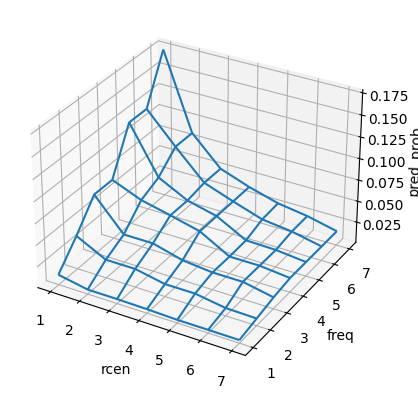

In [43]:
# 最新度(rcen)と頻度(freq)に対して推定した再閲覧確率を対応付ける3Dグラフの作成
Freq = rf_df.freq.unique().tolist()
Rcen = rf_df.rcen.unique().tolist()
Z = [rf_df[(rf_df['freq']==freq) & (rf_df['rcen']==rcen)]['pred_prob'].iloc[0] for freq in Freq for rcen in Rcen]
Z = np.array(Z).reshape((len(Freq), len(Rcen)))
X, Y = np.meshgrid(Rcen, Freq)  
fig = plt.figure()
ax = fig.add_subplot(111
                     , projection="3d"
                     , xlabel='rcen'
                     , ylabel='freq'
                     , zlabel='pred_prob'
                    )
ax.plot_wireframe(X, Y, Z)

### 数理モデルの適用

In [44]:
# はじめに紹介したデータを作成
Rows4 = [('item1', 1, 6)
        , ('item2', 2, 2)
        , ('item3', 1, 2)
        , ('item4', 1, 1)
        ]
sample_df = pd.DataFrame(Rows4, columns=['item_name', 'rcen', 'freq'])
sample_df

,item_name,rcen,freq
0,item1,1,6
1,item2,2,2
2,item3,1,2
3,item4,1,1


In [45]:
# 推定した再閲覧確率を結合
pd.merge(sample_df, rf_df, left_on=['rcen', 'freq'], right_on=['rcen', 'freq'])

,item_name,rcen,freq,N,pv,prob,pred_prob
0,item1,1,6,177,20,0.112994,0.121212
1,item2,2,2,3162,67,0.021189,0.022278
2,item3,1,2,3323,132,0.039723,0.039723
3,item4,1,1,19602,245,0.012499,0.012499


### 数理モデルのブラッシュアップ

rcen
1         NaN
2   -0.011416
3    0.000150
4   -0.002528
5   -0.001805
6   -0.000856
7   -0.000793
Name: prob, dtype: float64

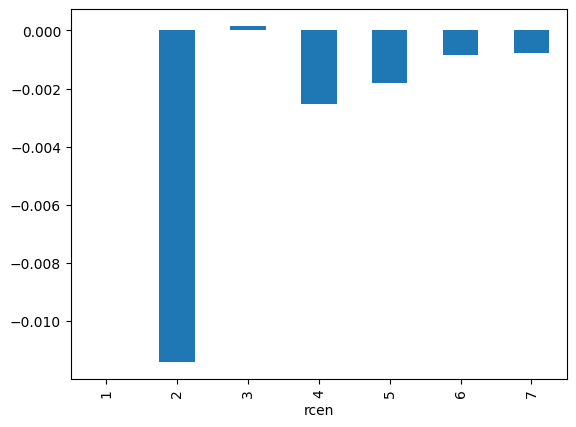

In [46]:
# 最新度(rcen)に対して、再閲覧確率の下降幅が小さくなることを確認
rcen_df['prob'].diff().plot.bar()
rcen_df['prob'].diff()

freq
1         NaN
2    0.012805
3    0.013556
4    0.008247
5    0.005905
6    0.010783
7    0.003202
Name: prob, dtype: float64

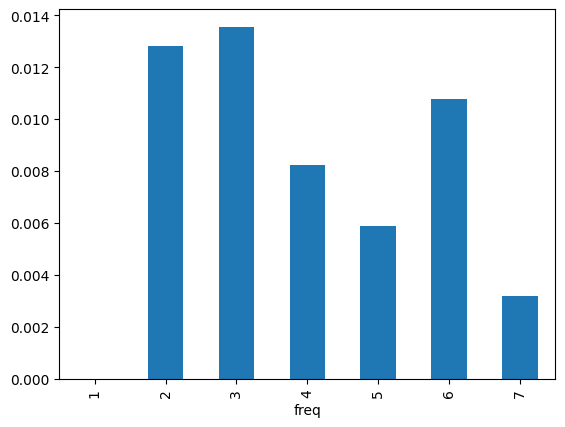

In [47]:
# 頻度(freq)に対して、再閲覧確率の上昇幅が小さくなることを確認
freq_df['prob'].diff().plot.bar()
freq_df['prob'].diff()

### 全体のコード

In [48]:
import cvxopt

R = sorted(tar_df['rcen'].unique().tolist())
F = sorted(tar_df['freq'].unique().tolist())

Idx = []
RF2Idx = {}
idx = 0
for r in R:
    for f in F:
        Idx.append(idx)
        RF2Idx[r, f] = idx 
        idx += 1

G_list = []
h_list = []
var_vec = [0.0] * len(Idx)

# - pred_prob[r,f] <= 0 のモデリング
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        G_row = var_vec[:]
        G_row[idx] = -1 # pred_prob[r,f]の係数は-1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0
        
# pred_prob[r,f] <= 1 のモデリング
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        G_row = var_vec[:]
        G_row[idx] = 1
        G_list.append(G_row)
        h_list.append(1)        

# - pred_prob[r,f] + pred_prob[r+1,f] <= 0 のモデリング
for r in R[:-1]:
    for f in F:
        idx1 = RF2Idx[r,f]
        idx2 = RF2Idx[r+1,f]
        G_row = var_vec[:]
        G_row[idx1] = -1 # pred_prob[r,f]の係数は-1
        G_row[idx2] = 1  # pred_prob[r+1,f]の係数は1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0        
        
# pred_prob[r,f] - pred_prob[r,f+1] <= 0 のモデリング
for r in R:
    for f in F[:-1]:
        idx1 = RF2Idx[r,f]
        idx2 = RF2Idx[r,f+1]
        G_row = var_vec[:]
        G_row[idx1] = 1  # pred_prob[r,f]の係数は1
        G_row[idx2] = -1 # pred_prob[r,f+1]の係数は-1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0        
        
# - pred_prob[r,f] + 2 * pred_prob[r+1,f] - pred_prob[r+2,f] <= 0 のモデリング
for r in R[:-2]:
    for f in F:
        idx1 = RF2Idx[r,f]
        idx2 = RF2Idx[r+1,f]
        idx3 = RF2Idx[r+2,f]
        G_row = var_vec[:]
        G_row[idx1] = -1 # pred_prob[r,f]の係数は-1
        G_row[idx2] = 2  # pred_prob[r+1,f]の係数は2
        G_row[idx3] = -1 # pred_prob[r+2,f]の係数は-1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0
        
# pred_prob[r,f] - 2 * pred_prob[r,f+1] + pred_prob[r,f+2] <= 0 のモデリング
for r in R:
    for f in F[:-2]:
        idx1 = RF2Idx[r,f]
        idx2 = RF2Idx[r,f+1]
        idx3 = RF2Idx[r,f+2]
        G_row = var_vec[:]
        G_row[idx1] = 1  # pred_prob[r,f]の係数は-1
        G_row[idx2] = -2 # pred_prob[r,f+1]の係数は2
        G_row[idx3] = 1  # pred_prob[r,f+2]の係数は-1
        G_list.append(G_row)
        h_list.append(0) # 右辺は定数項0
        
P_list = []
q_list = []

# N[r,f] * pred_prob[r,f]^2 - 2 * N[r,f] * prob[r,f] のモデリング
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        N = RF2N[r,f]
        prob = RF2Prob[r,f]
        P_row = var_vec[:]
        P_row[idx] = 2 * N # (1/2)を打ち消すために2を掛ける
        P_list.append(P_row)
        ｑ_list.append( - 2 * N * prob)

G = cvxopt.matrix(np.array(G_list), tc='d')
h = cvxopt.matrix(np.array(h_list), tc='d')
P = cvxopt.matrix(np.array(P_list), tc='d')
q = cvxopt.matrix(np.array(q_list), tc='d')

sol = cvxopt.solvers.qp(P, q, G, h)
status = sol['status']
print(status)

     pcost       dcost       gap    pres   dres
 0: -5.2387e+01 -1.0684e+02  5e+02  2e+00  2e-02
 1: -5.2162e+01 -7.3611e+01  5e+01  2e-01  1e-03
 2: -5.1452e+01 -6.2961e+01  2e+01  4e-02  4e-04
 3: -5.1298e+01 -5.5766e+01  6e+00  1e-02  8e-05
 4: -5.1190e+01 -5.2365e+01  1e+00  1e-03  1e-05
 5: -5.1182e+01 -5.1589e+01  4e-01  1e-04  1e-06
 6: -5.1206e+01 -5.1382e+01  2e-01  5e-05  4e-07
 7: -5.1216e+01 -5.1298e+01  8e-02  6e-06  5e-08
 8: -5.1223e+01 -5.1241e+01  2e-02  1e-06  1e-08
 9: -5.1225e+01 -5.1228e+01  2e-03  2e-16  8e-16
10: -5.1226e+01 -5.1226e+01  7e-05  2e-16  5e-16
11: -5.1226e+01 -5.1226e+01  1e-06  2e-16  2e-15
Optimal solution found.
optimal


In [49]:
# 最新度(rcen)と頻度(freq)に対応する推定した再閲覧確率の辞書を作成
RF2PredProb2 = {}
X = sol['x']
for r in R:
    for f in F:
        idx = RF2Idx[r,f]
        pred_prob = X[idx]
        RF2PredProb2[r,f] = pred_prob
rf_df['pred_prob2'] = rf_df.apply(lambda x:RF2PredProb2[x['rcen'], x['freq']], axis=1)
rf_df.head()        

,rcen,freq,N,pv,prob,pred_prob,pred_prob2
0,1,1,19602,245,0.012499,0.012499,0.012499
1,1,2,3323,132,0.039723,0.039723,0.039723
2,1,3,1120,81,0.072321,0.070524,0.066240
3,1,4,539,36,0.066790,0.070524,0.087729
4,1,5,285,36,0.126316,0.121212,0.109218


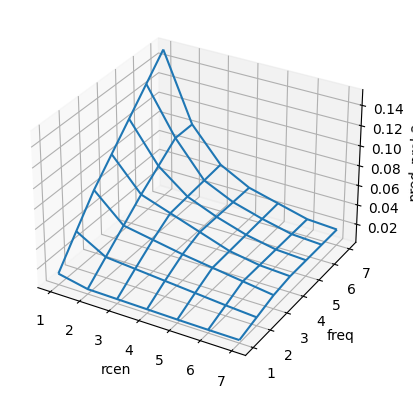

In [50]:
# 最新度(rcen)と頻度(freq)に対して推定した再閲覧確率を対応付ける3Dグラフの作成
Freq = rf_df['freq'].unique().tolist()
Rcen = rf_df['rcen'].unique().tolist()
Z = [rf_df[(rf_df['freq']==freq) & (rf_df['rcen']==rcen)]['pred_prob2'].iloc[0] for freq in Freq for rcen in Rcen]
Z = np.array(Z).reshape((len(Freq), len(Rcen)))
X, Y = np.meshgrid(Rcen, Freq)  
fig = plt.figure()
ax = fig.add_subplot(111
                     , projection="3d"
                     , xlabel='rcen'
                     , ylabel='freq'
                     , zlabel='pred_prob2'
                    )
ax.plot_wireframe(X, Y, Z)

### 凸二次計画問題の行列表現の補足

In [51]:
import numpy as np
import cvxopt

G_list = [[-1, 0, 0]
         ,[ 1, 0, 0]
         ,[ 0,-1, 0]
         ,[ 0, 1, 0]
         ,[ 0, 0,-1]
         ,[ 0, 0, 1]
         ,[ 1,-1, 0]
         ,[ 0, 1,-1]
         ,[ 1,-2, 1]
]

h_list = [0
          ,1
          ,0
          ,1
          ,0
          ,1
          ,0
          ,0
          ,0]

P_list = [[2*100 ,0    ,0   ]
         ,[0     ,2*50 ,0   ]
         ,[0     ,0    ,2*10]
]

q_list = [-2 * 100 * 0.1
          ,-2 * 50 * 0.15
          ,-2 * 10 * 0.25
         ]

G = cvxopt.matrix(np.array(G_list), tc='d')
h = cvxopt.matrix(np.array(h_list), tc='d')
P = cvxopt.matrix(np.array(P_list), tc='d')
q = cvxopt.matrix(np.array(q_list), tc='d')

sol = cvxopt.solvers.qp(P, q, G, h)
status = sol['status']
print('status:',status)

X = sol['x']
for x in X:
    print('x:',x)

     pcost       dcost       gap    pres   dres
 0: -2.7425e+00 -6.4628e+00  2e+01  2e+00  2e-01
 1: -2.6356e+00 -4.4661e+00  2e+00  3e-16  1e-16
 2: -2.7282e+00 -2.8191e+00  9e-02  3e-16  3e-17
 3: -2.7361e+00 -2.7394e+00  3e-03  1e-16  7e-17
 4: -2.7368e+00 -2.7369e+00  3e-05  1e-16  7e-17
 5: -2.7368e+00 -2.7368e+00  3e-07  2e-16  9e-17
Optimal solution found.
status: optimal
x: 0.09736840835953961
x: 0.16052635585676464
x: 0.22368416017154524
